In [67]:
import pandas  as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [46]:
df = pd.read_csv("Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [48]:
df["Gender"].replace({"Male":0,'Female':1},inplace = True)

In [49]:
df["Gender"].unique()

array([0, 1], dtype=int64)

In [51]:
df.drop('User ID',inplace =True,axis =1)

In [52]:
df

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0
...,...,...,...,...
395,1,46,41000,1
396,0,51,23000,1
397,1,50,20000,1
398,0,36,33000,0


In [53]:
df.isna().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           400 non-null    int64
 1   Age              400 non-null    int64
 2   EstimatedSalary  400 non-null    int64
 3   Purchased        400 non-null    int64
dtypes: int64(4)
memory usage: 12.6 KB


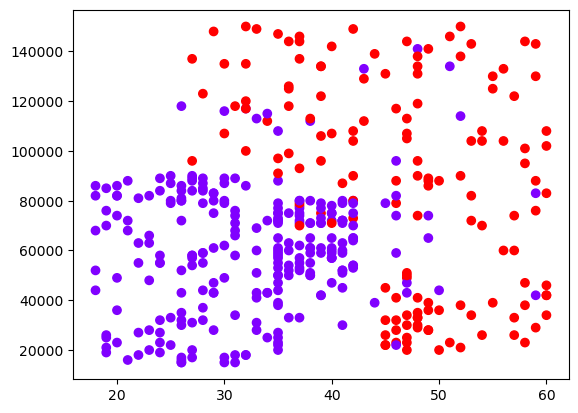

In [55]:
plt.scatter(df['Age'],df["EstimatedSalary"],c = df['Purchased'],cmap = "rainbow")

In [56]:
x = df.drop('Purchased',axis =1)
y = df["Purchased"]

In [57]:
x

,Gender,Age,EstimatedSalary
0,0,19,19000
1,0,35,20000
2,1,26,43000
3,1,27,57000
4,0,19,76000
...,...,...,...
395,1,46,41000
396,0,51,23000
397,1,50,20000
398,0,36,33000


In [58]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

# Scaling 

In [59]:
std_scaler = StandardScaler()
x_std = std_scaler.fit_transform(x)

std_df = pd.DataFrame(x_std,columns= x.columns)
std_df

,Gender,Age,EstimatedSalary
0,-1.020204,-1.781797,-1.490046
1,-1.020204,-0.253587,-1.460681
2,0.980196,-1.113206,-0.785290
3,0.980196,-1.017692,-0.374182
4,-1.020204,-1.781797,0.183751
...,...,...,...
395,0.980196,0.797057,-0.844019
396,-1.020204,1.274623,-1.372587
397,0.980196,1.179110,-1.460681
398,-1.020204,-0.158074,-1.078938


In [63]:
# Train Test Split
x_train,x_test,y_train,y_test = train_test_split(std_df,y,test_size=0.2,
                                                random_state=1,stratify=y)

In [62]:
df["Purchased"].unique()

array([0, 1], dtype=int64)

In [64]:
y.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [79]:
svm_model = SVC()
svm_model.fit(x_train,y_train)

SVC()

In [80]:
# Testing DAta ACcuracy :- 
y_pred = svm_model.predict(x_test)

acc_test = accuracy_score(y_test,y_pred)
print("Accuracy Of Testing Data is =\n ",acc_test)
clf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix is = \n",clf_matrix)
cls_report = classification_report(y_test,y_pred)
print("Classification Report is =\n ",cls_report)

Accuracy Of Testing Data is =
  0.875
Confusion Matrix is = 
 [[45  6]
 [ 4 25]]
Classification Report is =
                precision    recall  f1-score   support

           0       0.92      0.88      0.90        51
           1       0.81      0.86      0.83        29

    accuracy                           0.88        80
   macro avg       0.86      0.87      0.87        80
weighted avg       0.88      0.88      0.88        80



# Hyperparameter
# 1)GridSearchCv()

In [69]:
hype = {'C':np.arange(1,100),
       'kernel':['rdf','sigmoid','linear','poly']}

In [71]:
import warnings
warnings.filterwarnings('ignore')

In [72]:
svm_model = SVC()
gscv_clf = GridSearchCV(svm_model,hype,cv=5)
gscv_clf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'kernel': ['rdf', 'sigmoid', 'linear', 'poly']})

In [73]:
gscv_clf.best_estimator_

SVC(C=18, kernel='poly')

In [74]:
gscv_clf.best_params_

{'C': 18, 'kernel': 'poly'}

# Using Hyperparmeter


In [81]:
svm_model = SVC(C=18,kernel = 'poly')
svm_model.fit(x_train,y_train)

SVC(C=18, kernel='poly')

In [82]:
# Testing DAta ACcuracy :- 
y_pred = svm_model.predict(x_test)

acc_test = accuracy_score(y_test,y_pred)
print("Accuracy Of Testing Data is = \n",acc_test)
clf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix is = \n",clf_matrix)
cls_report = classification_report(y_test,y_pred)
print("Classification Report is =\n ",cls_report)

Accuracy Of Testing Data is = 
 0.85
Confusion Matrix is = 
 [[45  6]
 [ 6 23]]
Classification Report is =
                precision    recall  f1-score   support

           0       0.88      0.88      0.88        51
           1       0.79      0.79      0.79        29

    accuracy                           0.85        80
   macro avg       0.84      0.84      0.84        80
weighted avg       0.85      0.85      0.85        80



# Scaling 
1)MinMaxScaler()

In [83]:
svm_model = SVC()
minmax_scaler =MinMaxScaler()
x_df =minmax_scaler.fit_transform(x)

scale_df =pd.DataFrame(x_df,columns=x.columns)
scale_df

,Gender,Age,EstimatedSalary
0,0.0,0.023810,0.029630
1,0.0,0.404762,0.037037
2,1.0,0.190476,0.207407
3,1.0,0.214286,0.311111
4,0.0,0.023810,0.451852
...,...,...,...
395,1.0,0.666667,0.192593
396,0.0,0.785714,0.059259
397,1.0,0.761905,0.037037
398,0.0,0.428571,0.133333


In [85]:
# Train Test Split
x_train,x_test,y_train,y_test = train_test_split(scale_df,y,test_size=0.2,
                                                 random_state=1,stratify=y)

In [87]:
svm_model =SVC()
svm_model.fit(x_train,y_train)

SVC()

In [88]:
# Testing DAta ACcuracy :- 
y_pred = svm_model.predict(x_test)

acc_test = accuracy_score(y_test,y_pred)
print("Accuracy Of Testing Data is = \n",acc_test)
clf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix is = \n",clf_matrix)
cls_report = classification_report(y_test,y_pred)
print("Classification Report is =\n ",cls_report)

Accuracy Of Testing Data is = 
 0.8625
Confusion Matrix is = 
 [[44  7]
 [ 4 25]]
Classification Report is =
                precision    recall  f1-score   support

           0       0.92      0.86      0.89        51
           1       0.78      0.86      0.82        29

    accuracy                           0.86        80
   macro avg       0.85      0.86      0.85        80
weighted avg       0.87      0.86      0.86        80



# Randomised SearchCv()

In [89]:
svm_model = SVC()
rscv_clf =RandomizedSearchCV(svm_model,hype,cv=5)
rscv_clf.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                                        'kernel': ['rdf', 'sigmoid', 'linear',
                                                   'poly']})

In [90]:
rscv_clf.best_estimator_

SVC(C=33, kernel='poly')

In [91]:
rscv_clf.best_params_

{'kernel': 'poly', 'C': 33}

In [93]:
svm_model = SVC(C=33,kernel ='poly')
svm_model.fit(x_train,y_train)

SVC(C=33, kernel='poly')

In [94]:
# Training Data Accuracy
y_pred = svm_model.predict(x_train)
acc_training = accuracy_score(y_train,y_pred)
print("Accuracy of Training  Data  = ",acc_training)
clf_mtx =confusion_matrix(y_train,y_pred)
print("Confusion MAtrix = ",clf_mtx)
print(classification_report(y_train,y_pred))


Accuracy of Training  Data  =  0.925
Confusion MAtrix =  [[193  13]
 [ 11 103]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       206
           1       0.89      0.90      0.90       114

    accuracy                           0.93       320
   macro avg       0.92      0.92      0.92       320
weighted avg       0.93      0.93      0.93       320



In [95]:
# Testing DAta ACcuracy :- 
y_pred = svm_model.predict(x_test)

acc_test = accuracy_score(y_test,y_pred)
print("Accuracy Of Testing Data is = \n",acc_test)
clf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix is = \n",clf_matrix)
cls_report = classification_report(y_test,y_pred)
print("Classification Report is =\n ",cls_report)

Accuracy Of Testing Data is = 
 0.875
Confusion Matrix is = 
 [[44  7]
 [ 3 26]]
Classification Report is =
                precision    recall  f1-score   support

           0       0.94      0.86      0.90        51
           1       0.79      0.90      0.84        29

    accuracy                           0.88        80
   macro avg       0.86      0.88      0.87        80
weighted avg       0.88      0.88      0.88        80

